# Project: Customer Segmentation using Unsupervised Learning

## Overview
**Problem:**  
In this project, unsupervised learning techniques are applied to identify segments of the population that form the core customer base for a mail-order sales company in Germany. These segments can then be used to direct marketing campaigns towards audiences that will have the highest expected rate of returns.   

**Dataset:**  
The data that you will use has been provided by Bertelsmann Arvato Analytics, and represents a real-life data science task.


In [1]:
# import libraries here
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import ast

# magic word for producing visualizations in notebook
%matplotlib inline

'\nImport note: The classroom currently uses sklearn version 0.19.\nIf you need to use an imputer, it is available in sklearn.preprocessing.Imputer,\ninstead of sklearn.impute as in newer versions of sklearn.\n'

### Step 0: Load the Data

There are four files associated with this project (not including this one):

- `Udacity_AZDIAS_Subset.csv`: Demographics data for the general population of Germany; 891211 persons (rows) x 85 features (columns).
- `Udacity_CUSTOMERS_Subset.csv`: Demographics data for customers of a mail-order company; 191652 persons (rows) x 85 features (columns).
- `Data_Dictionary.md`: Detailed information file about the features in the provided datasets.
- `AZDIAS_Feature_Summary.csv`: Summary of feature attributes for demographics data; 85 features (rows) x 4 columns

Each row of the demographics files represents a single person, but also includes information outside of individuals, including information about their household, building, and neighborhood. This information will be used to cluster the general population into groups with similar demographic properties. Then, we will observe how the people in the customers dataset fit into those created clusters. The hope here is that certain clusters are over-represented in the customers data, as compared to the general population; those over-represented clusters will be assumed to be part of the core userbase. This information can then be used for further applications, such as targeting for a marketing campaign.

In [2]:
# Load in the general demographics data.
azdias = pd.read_csv('Udacity_AZDIAS_Subset.csv', delimiter=';')

# Load in the feature summary file.
feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter=';')

In [3]:
# Check the structure of the data after it's loaded (e.g. print the number of rows and columns, print the first few rows).
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,-1,2,1,2.0,3,4,3,5,5,3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,-1,1,2,5.0,1,5,2,5,4,5,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,-1,3,2,3.0,1,4,1,2,3,5,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2,4,2,2.0,4,2,5,2,1,2,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,-1,3,1,5.0,4,3,4,1,3,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


In [4]:
azdias.describe()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
count,891221.000000,891221.000000,891221.000000,886367.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,891221.000000,...,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,774706.000000,794005.000000,794005.000000,794005.00000
mean,-0.358435,2.777398,1.522098,3.632838,3.074528,2.821039,3.401106,3.033328,2.874167,3.075121,...,2.253330,2.801858,1.595426,0.699166,1.943913,3.612821,3.381087,3.167854,5.293002,3.07222
std,1.198724,1.068775,0.499512,1.595021,1.321055,1.464749,1.322134,1.529603,1.486731,1.353248,...,0.972008,0.920309,0.986736,0.727137,1.459654,0.973967,1.111598,1.002376,2.303739,1.36298
min,-1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000
25%,-1.000000,2.000000,1.000000,2.000000,2.000000,1.000000,3.000000,2.000000,2.000000,2.000000,...,1.000000,2.000000,1.000000,0.000000,1.000000,3.000000,3.000000,3.000000,4.000000,2.00000
50%,-1.000000,3.000000,2.000000,4.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,...,2.000000,3.000000,2.000000,1.000000,1.000000,4.000000,3.000000,3.000000,5.000000,3.00000
75%,-1.000000,4.000000,2.000000,5.000000,4.000000,4.000000,5.000000,5.000000,4.000000,4.000000,...,3.000000,3.000000,2.000000,1.000000,3.000000,4.000000,4.000000,4.000000,7.000000,4.00000
max,3.000000,9.000000,2.000000,6.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,4.000000,4.000000,3.000000,2.000000,5.000000,5.000000,5.000000,9.000000,9.000000,9.00000


In [5]:
azdias.shape

(891221, 85)

## Step 1: Preprocessing

### Step 1.1: Assess Missing Data

The feature summary file contains a summary of properties for each demographics data column. We can use this file to help make cleaning decisions during this stage of the project. First of all, We should assess the demographics data in terms of missing data. 

#### Step 1.1.1: Convert Missing Value Codes to NaNs
The fourth column of the feature attributes summary (loaded in above as `feat_info`) documents the codes from the data dictionary that indicate missing or unknown data. While the file encodes this as a list (e.g. `[-1,0]`), this will get read in as a string object. You'll need to do a little bit of parsing to make use of it to identify and clean the data. Convert data that matches a 'missing' or 'unknown' value code into a numpy NaN value. 

In [6]:
def process_missing_values(x):
    result = []
    # remove the brackets
    x = x[1:-1]
    if x != '':
        # split the string by the comma
        missing_values = x.split(',')
        for value in missing_values:
            try: # if the element is a number just convert it into an int and append it to the result
                result.append(int(value))
            except ValueError: 
                # if the element is a string like 'X' or 'XX', it will cause value error so append it without conversion
                result.append(value)
    return result

In [7]:
feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].apply(process_missing_values)

In [8]:
feat_info.head()

,attribute,information_level,type,missing_or_unknown
0,AGER_TYP,person,categorical,"[-1, 0]"
1,ALTERSKATEGORIE_GROB,person,ordinal,"[-1, 0, 9]"
2,ANREDE_KZ,person,categorical,"[-1, 0]"
3,CJT_GESAMTTYP,person,categorical,[0]
4,FINANZ_MINIMALIST,person,ordinal,[-1]


In [9]:
for attribute, missing_values in zip(feat_info['attribute'], feat_info['missing_or_unknown']):
    # If the list is not empty
    if len(missing_values) > 0:
        # For the values in missing values find the record and set it to NaN
        for value in missing_values:
            azdias.loc[azdias[attribute] == value, attribute] = np.NaN

In [10]:
azdias.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,NaN,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,NaN,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,2.0,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,NaN,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0


#### Step 1.1.2: Assess Missing Data in Each Column

In [11]:
print('Total number of missing values in the dataset: ', azdias.isnull().sum().sum())

Total number of missing values in the dataset:  8373929


In [12]:
# Perform an assessment of how much missing data there is in each column of the dataset.
df_md = pd.DataFrame(azdias.isnull().sum(), columns=['missing_values'])

# Calculate the % of missing data in each column
missing_data_perc = (df_md[df_md > 0] / azdias.shape[0]) * 100

df_md['missing_values_%'] = missing_data_perc
df_md.sort_values(by=['missing_values', 'missing_values_%'], inplace=True)

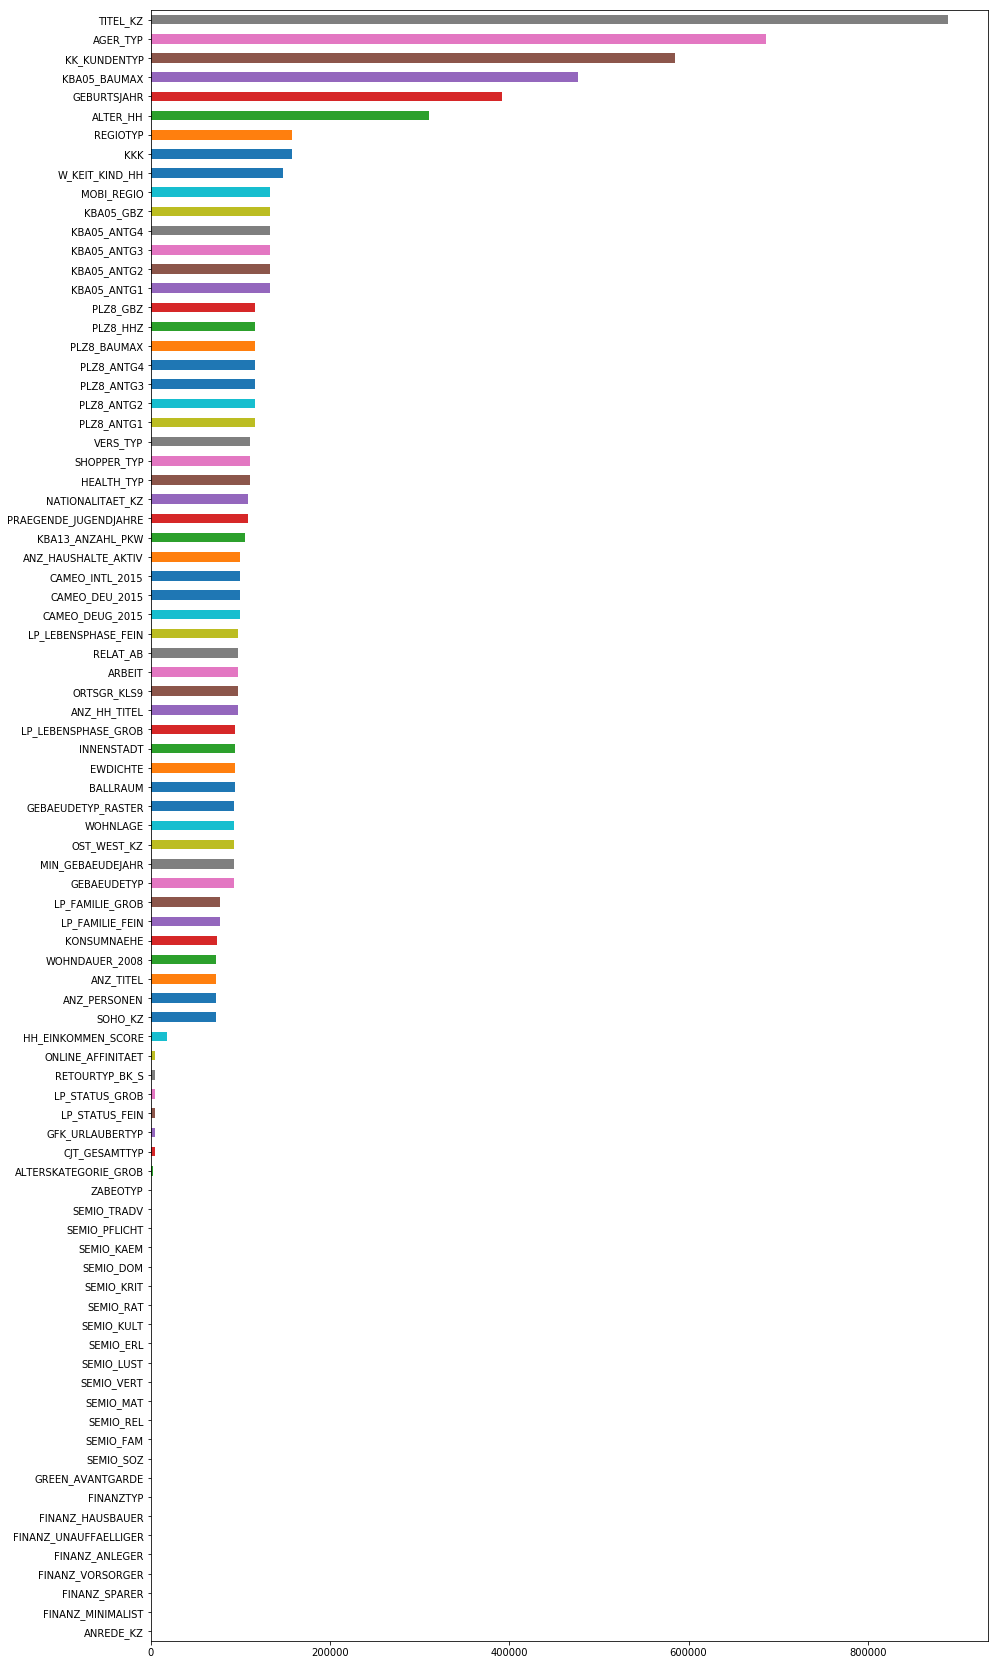

In [13]:
# Investigate patterns in the amount of missing data in each column.
plt.figure(figsize=(15, 30))
df_md['missing_values'].plot(kind='barh')

In [14]:
df_md.sort_values(by=['missing_values', 'missing_values_%'], ascending=False)

,missing_values,missing_values_%
TITEL_KZ,889061,99.757636
AGER_TYP,685843,76.955435
KK_KUNDENTYP,584612,65.596749
KBA05_BAUMAX,476524,53.468668
GEBURTSJAHR,392318,44.020282
ALTER_HH,310267,34.813699
KKK,158064,17.735668
REGIOTYP,158064,17.735668
W_KEIT_KIND_HH,147988,16.605084
KBA05_ANTG1,133324,14.959701


In [15]:
# Remove the outlier columns from the dataset.
# Get the columns names having more than 30% of missing data
outlier_column_names = list(df_md[df_md['missing_values_%'] > 30].index)
outlier_column_names

['ALTER_HH',
 'GEBURTSJAHR',
 'KBA05_BAUMAX',
 'KK_KUNDENTYP',
 'AGER_TYP',
 'TITEL_KZ']

In [16]:
# Drop the outlier columns
azdias.drop(labels=outlier_column_names, inplace=True, axis=1)

#### Discussion 1.1.2: Assess Missing Data in Each Column

The columns with more than 30% of missing values will cause the distribution to be skewed so those columns with more than 30% of missing values are the outlier columns.
Majority of columns with missing data values were around 10-15% but these won't skew the distribution too much.
The outlier columns, that were dropped are the following:
- TITEL_KZ
- AGER_TYP
- KK_KUNDENTYP
- KBA05_BAUMAX
- GEBURTSJAHR
- ALTER_HH

#### Step 1.1.3: Assess Missing Data in Each Row

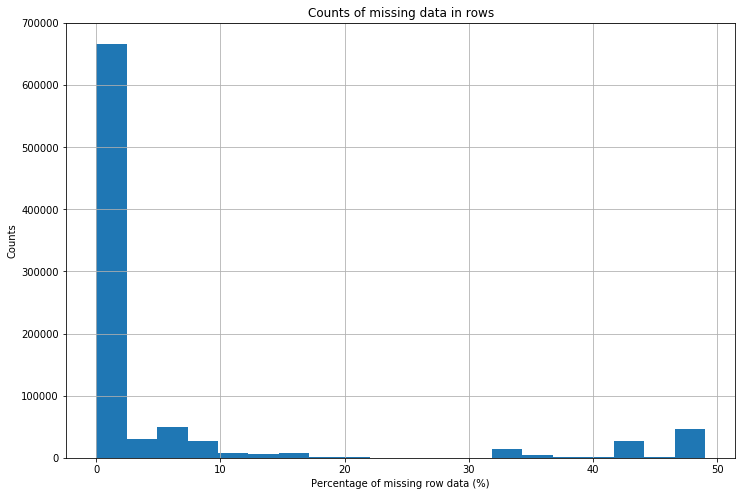

In [17]:
# How much data is missing in each row of the dataset?
# Perform an assessment of how much missing data there is in each column of the dataset.
df_md_rows = pd.DataFrame(azdias.isnull().sum(axis=1), columns=['missing_values_rows'])

# Sort the dataframe in ascending order for visualization
df_md_rows.sort_values(by=['missing_values_rows'], inplace=True)

plt.figure(figsize=(12, 8))
df_md_rows['missing_values_rows'].hist(bins=20)
plt.xlabel('Percentage of missing row data (%)')
plt.ylabel('Counts')
plt.title('Counts of missing data in rows')
plt.show()

In [18]:
df_md_rows.sort_values(by=['missing_values_rows'], inplace=True, ascending=False)
df_md_rows

,missing_values_rows
643174,49
732775,49
472919,48
397806,47
344502,47
397698,47
397729,47
397733,47
397770,47
344437,47


There are some rows with almost 50 missing values and such high number could adversely impact the analysis and according to the histogram above the suitable threshold could be between 10-30 so will keep my threshold of 15 missing values for the distribution of data in two subsets.

In [19]:
# Write code to divide the data into two subsets based on the number of missing
# values in each row.
# Dataframe with less than 15 missing values in each row
df_few_missing = azdias[azdias.isnull().sum(axis=1) < 15]
df_many_missing = azdias[azdias.isnull().sum(axis=1) >= 15]

In [20]:
df_few_missing.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,2.0,3.0,2.0,1.0,1.0,5.0,4.0,3.0,5.0,4.0
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,3.0,3.0,1.0,0.0,1.0,4.0,4.0,3.0,5.0,2.0
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,...,2.0,2.0,2.0,0.0,1.0,3.0,4.0,2.0,3.0,3.0
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,4.0,6.0,5.0
5,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,2.0,...,2.0,3.0,1.0,1.0,1.0,5.0,5.0,2.0,3.0,3.0


In [21]:
print('Number of rows with few missing values: ', len(df_few_missing))
perc_few_missing = (len(df_few_missing)/azdias.shape[0]) * 100
print('Percentage of data with few missing values: ', perc_few_missing)

Number of rows with few missing values:  787544
Percentage of data with few missing values:  88.36685850086566


In [22]:
df_many_missing.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2.0,1.0,2.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
11,2.0,1.0,6.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
14,3.0,1.0,6.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
17,2.0,1.0,6.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24,3.0,2.0,6.0,3.0,4.0,3.0,5.0,5.0,3.0,4.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [23]:
print('Number of rows with many missing values: ', len(df_many_missing))
perc_many_missing = (len(df_many_missing)/azdias.shape[0]) * 100
print('Percentage of data with many missing values: ', perc_many_missing)

Number of rows with many missing values:  103677
Percentage of data with many missing values:  11.633141499134334


In [24]:
# Compare the distribution of values for at least five columns where there are
# no or few missing values, between the two subsets.

def compare_distributions(no_of_columns):
    # Get the column names from either few missing subset or many missing subset
    columns = df_few_missing.columns[:no_of_columns]
    fig, ax = plt.subplots(no_of_columns, 2, figsize=(15, 30))
    ax = ax.ravel()

    fig.subplots_adjust(hspace=2 , wspace=.4)

    for i in range(no_of_columns):
        sns.countplot(df_few_missing[columns[i]], ax=ax[i*2])
        ax[i*2].set_title('Few Missing Values')
        sns.countplot(df_many_missing[columns[i]], ax=ax[i*2+1])
        ax[i*2+1].set_title('Many Missing Values')

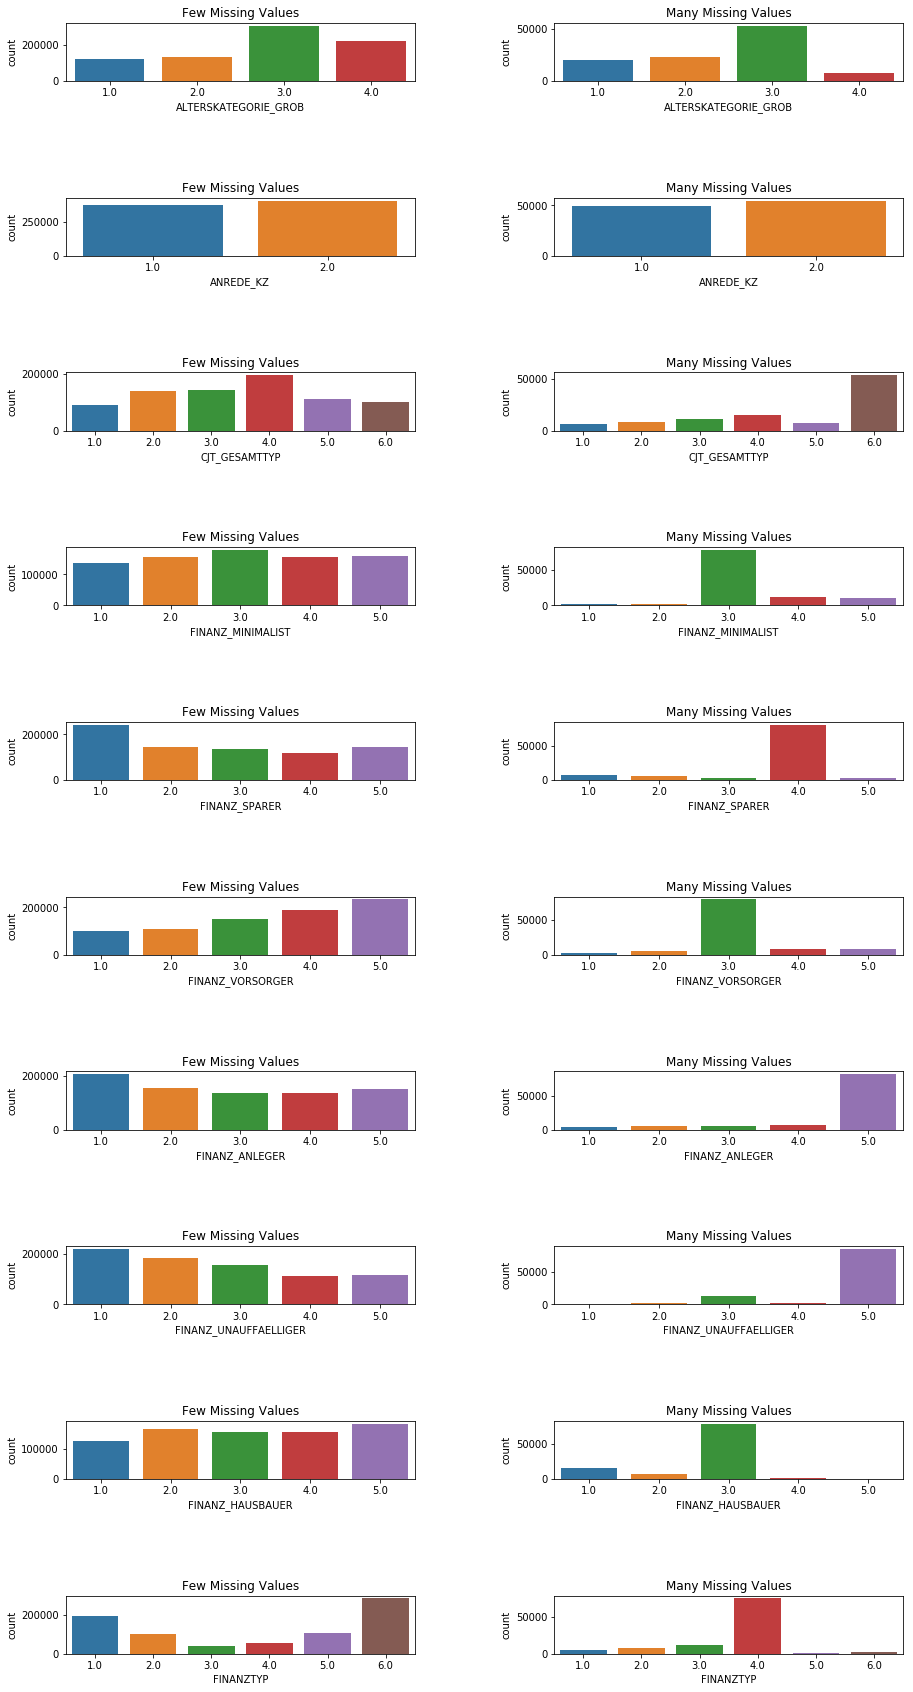

In [25]:
compare_distributions(10)

#### Discussion 1.1.3: Assess Missing Data in Each Row

Keeping in mind that I kept a threshold of 15 missing values in rows, we have over 88% data with few missing values and almost 12% data with many missing values.  
There is a tremendous difference in data with lots of missing values and data with few missing values. The distributions in case of many missing values are skewed or uneven as compared to the data with no/few missing values. There are some exceptions where the data is evenly distributed in both cases for instance, the columns ALTERKATEGORIE_GROS and ANREDE_KZ have almost similar distribution but since these are exceptions so would not make much of a difference in my opinion.

As I am proceeding to do the analysis with the data subset having few missing values, I will first fill out the missing values or drop the column with significant amount of missing data.

In [26]:
df_few_missing.isnull().sum()

ALTERSKATEGORIE_GROB      2723
ANREDE_KZ                    0
CJT_GESAMTTYP             4295
FINANZ_MINIMALIST            0
FINANZ_SPARER                0
FINANZ_VORSORGER             0
FINANZ_ANLEGER               0
FINANZ_UNAUFFAELLIGER        0
FINANZ_HAUSBAUER             0
FINANZTYP                    0
GFK_URLAUBERTYP           4295
GREEN_AVANTGARDE             0
HEALTH_TYP               35532
LP_LEBENSPHASE_FEIN      48386
LP_LEBENSPHASE_GROB      45633
LP_FAMILIE_FEIN          30331
LP_FAMILIE_GROB          30331
LP_STATUS_FEIN            4295
LP_STATUS_GROB            4295
NATIONALITAET_KZ         32809
PRAEGENDE_JUGENDJAHRE    27169
RETOURTYP_BK_S            4295
SEMIO_SOZ                    0
SEMIO_FAM                    0
SEMIO_REL                    0
SEMIO_MAT                    0
SEMIO_VERT                   0
SEMIO_LUST                   0
SEMIO_ERL                    0
SEMIO_KULT                   0
                         ...  
MIN_GEBAEUDEJAHR             0
OST_WEST

In [27]:
df_few_missing.isnull().sum().sum()

839624

In [28]:
# Fill in the missing values with backfill method
df_few_missing.fillna(method='bfill', inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


In [29]:
df_few_missing.isnull().sum().sum()

0

Hurray! We now have no missing values

### Step 1.2: Select and Re-Encode Features

In [30]:
# How many features are there of each data type?
feat_info['type'].value_counts()

ordinal        49
categorical    21
mixed           7
numeric         7
interval        1
Name: type, dtype: int64

#### Step 1.2.1: Re-Encode Categorical Features

In [31]:
# First let's get the categorical variable column names.
categorical_cols = list(feat_info[feat_info['type']=='categorical']['attribute'].values)

# Make sure to check and remove any outlier column names that we previously dropped
for c in outlier_column_names:
    if c in categorical_cols:
        categorical_cols.remove(c)

categorical_cols

['ANREDE_KZ',
 'CJT_GESAMTTYP',
 'FINANZTYP',
 'GFK_URLAUBERTYP',
 'GREEN_AVANTGARDE',
 'LP_FAMILIE_FEIN',
 'LP_FAMILIE_GROB',
 'LP_STATUS_FEIN',
 'LP_STATUS_GROB',
 'NATIONALITAET_KZ',
 'SHOPPER_TYP',
 'SOHO_KZ',
 'VERS_TYP',
 'ZABEOTYP',
 'GEBAEUDETYP',
 'OST_WEST_KZ',
 'CAMEO_DEUG_2015',
 'CAMEO_DEU_2015']

In [32]:
# Assess categorical variables: which are binary, which are multi-level, and
# which one needs to be re-encoded?
df_few_missing[categorical_cols].nunique().sort_values()

ANREDE_KZ            2
OST_WEST_KZ          2
VERS_TYP             2
SOHO_KZ              2
GREEN_AVANTGARDE     2
NATIONALITAET_KZ     3
SHOPPER_TYP          4
LP_STATUS_GROB       5
LP_FAMILIE_GROB      5
FINANZTYP            6
ZABEOTYP             6
CJT_GESAMTTYP        6
GEBAEUDETYP          7
CAMEO_DEUG_2015      9
LP_STATUS_FEIN      10
LP_FAMILIE_FEIN     11
GFK_URLAUBERTYP     12
CAMEO_DEU_2015      44
dtype: int64

In [33]:
# Check for the dtype of values in each column
for col in categorical_cols:
    print(f"{col} ---- {df_few_missing[col].dtype}")

ANREDE_KZ ---- float64
CJT_GESAMTTYP ---- float64
FINANZTYP ---- float64
GFK_URLAUBERTYP ---- float64
GREEN_AVANTGARDE ---- int64
LP_FAMILIE_FEIN ---- float64
LP_FAMILIE_GROB ---- float64
LP_STATUS_FEIN ---- float64
LP_STATUS_GROB ---- float64
NATIONALITAET_KZ ---- float64
SHOPPER_TYP ---- float64
SOHO_KZ ---- float64
VERS_TYP ---- float64
ZABEOTYP ---- float64
GEBAEUDETYP ---- float64
OST_WEST_KZ ---- object
CAMEO_DEUG_2015 ---- object
CAMEO_DEU_2015 ---- object


In [34]:
df_few_missing['OST_WEST_KZ'].unique()

array(['W', 'O'], dtype=object)

OST_WEST_KZ is the variable that takes on only two non-numeric values so we will encode it to numeric values

In [35]:
# Re-encode categorical variable(s) to be kept in the analysis.
df_few_missing['OST_WEST_KZ'].replace({'W':0, 'O':1}, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


I have chosen to drop columns having more than 10 values as encoding them will add unnecessary columns hence increase the dimensions.

In [36]:
# Get the column names having more than 10 values
columns_gt_10_values = []
for col in categorical_cols:
    if len(df_few_missing[col].unique()) > 10:
        columns_gt_10_values.append(col)
        
columns_gt_10_values

['GFK_URLAUBERTYP', 'LP_FAMILIE_FEIN', 'CAMEO_DEU_2015']

In [37]:
df_few_missing.drop(labels=columns_gt_10_values, axis=1, inplace=True)

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


We have some object type columns that we need to encode so let's get their names first.

In [38]:
obj_type_cols = []
for col in categorical_cols:
    if col in df_few_missing.columns and df_few_missing[col].dtype == "object":
        obj_type_cols.append(col)
obj_type_cols

['CAMEO_DEUG_2015']

In [39]:
df_few_missing_enc = pd.get_dummies(df_few_missing, columns=obj_type_cols)
df_few_missing_enc.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,RELAT_AB,CAMEO_DEUG_2015_1,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,4.0,0,0,0,0,0,0,0,1,0
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,2.0,0,0,0,1,0,0,0,0,0
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,...,3.0,0,1,0,0,0,0,0,0,0
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,...,5.0,0,0,0,0,0,1,0,0,0
5,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,2.0,...,3.0,0,0,0,0,0,0,0,1,0


First, I filled the missing values in few missing values subset using the backfill method with fillna function Then, selected the categorical columns from and calculated the number of values they have. I dropped the columns having more than 10 values to avoid the unnecessary increase in the number of columns that may contribute to curse of dimensionality.

The column 'OST_WEST_KZ' had only two non-numeric values so I converted it to numeric values manually using the pandas Series.replace function. 
After filtering the columns having more than 10 values, there remained a column that had type 'object' so I one-hot encoded it using pandas pd.get_dummies function.

#### Step 1.2.2: Engineer Mixed-Type Features

In [40]:
# Get the mixed type feature names
mixed_cols = list(feat_info[feat_info['type']=='mixed']['attribute'].values)

# Make sure to check and remove any outlier column names that we previously dropped
for c in outlier_column_names:
    if c in mixed_cols:
        mixed_cols.remove(c)

mixed_cols

['LP_LEBENSPHASE_FEIN',
 'LP_LEBENSPHASE_GROB',
 'PRAEGENDE_JUGENDJAHRE',
 'WOHNLAGE',
 'CAMEO_INTL_2015',
 'PLZ8_BAUMAX']

In [41]:
# Investigate "PRAEGENDE_JUGENDJAHRE" and engineer two new variables.
df_few_missing_enc['PRAEGENDE_JUGENDJAHRE'].unique()

array([ 14.,  15.,   8.,   3.,  10.,  11.,   5.,   9.,   6.,   4.,   2.,
         1.,  12.,  13.,   7.])

In [42]:
# Let's Engineer the "PRAEGENDE_JUGENDJAHRE" variable into two new variables
decades_dict = {
    0: [1, 2], # 40s
    1: [3, 4], # 50s
    2: [5, 6, 7], # 60s
    3: [8, 9], # 70s
    4: [10, 11, 12, 13], # 80s
    5: [14, 15] # 90s
}

def decade(x):
    for key, values in decades_dict.items():
        if x in values:
            return key
# Store all the mainstream
movement_list = [1, 3, 5, 8, 10, 12, 14]

def movement(x):
    if x in movement_list:
        return 1
    else:
        return 0

df_few_missing_enc['PRAEGENDE_JUGENDJAHRE_DECADE'] = df_few_missing_enc['PRAEGENDE_JUGENDJAHRE'].map(decade)
df_few_missing_enc['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df_few_missing_enc['PRAEGENDE_JUGENDJAHRE'].map(movement)

In [43]:
df_few_missing_enc.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,CAMEO_DEUG_2015_2,CAMEO_DEUG_2015_3,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,0,0,0,0,0,0,1,0,5,1
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,0,0,1,0,0,0,0,0,5,0
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,...,1,0,0,0,0,0,0,0,3,1
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,...,0,0,0,0,1,0,0,0,3,1
5,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,2.0,...,0,0,0,0,0,0,1,0,1,1


In [44]:
df_few_missing_enc['PRAEGENDE_JUGENDJAHRE_DECADE'].isnull().sum()

0

In [45]:
# Drop the original variable PRAEGENDE_JUGENDJAHRE
df_few_missing_enc.drop('PRAEGENDE_JUGENDJAHRE', axis=1, inplace=True)

In [46]:
# Investigate "CAMEO_INTL_2015" and engineer two new variables.
df_few_missing_enc['CAMEO_INTL_2015'].unique()

array(['51', '24', '12', '43', '54', '22', '14', '13', '15', '33', '41',
       '34', '55', '25', '23', '31', '52', '35', '45', '44', '32'], dtype=object)

In [47]:
# Engineering the "CAMEO_INTL_2015" into two new variables
# one's place digit place for wealth column
df_few_missing_enc['CAMEO_INTL_2015_WEALTH'] = df_few_missing_enc['CAMEO_INTL_2015'].apply(lambda x: int(x[0]))
# ten's place digit place for lifestage column
df_few_missing_enc['CAMEO_INTL_2015_LIFESTAGE'] = df_few_missing_enc['CAMEO_INTL_2015'].apply(lambda x: int(x[1]))

In [48]:
df_few_missing_enc.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,CAMEO_DEUG_2015_4,CAMEO_DEUG_2015_5,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,0,0,0,0,1,0,5,1,5,1
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,1,0,0,0,0,0,5,0,2,4
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,...,0,0,0,0,0,0,3,1,1,2
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,...,0,0,1,0,0,0,3,1,4,3
5,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,2.0,...,0,0,0,0,1,0,1,1,5,4


In [49]:
# Drop the original CAMEO_INTL_2015 column
df_few_missing_enc.drop('CAMEO_INTL_2015', axis=1, inplace=True)

In my opinion the WOHNLAGE or Residential area is also an indicator of a customer's status so It's worth keeping.

In [50]:
# Investigating "WOHNLAGE"
df_few_missing_enc['WOHNLAGE'].unique()

array([ 4.,  2.,  7.,  3.,  5.,  1.,  8.,  0.])

In [51]:
# Engineering the WOHNLAGE column into urban and rural neighborhood
# According to Data_Dictionary the values 7,8 indicate rural flags and others are non-rural/urban neighborhoods
rural_neighborhoods = [7, 8]
urban_neighborhoods = [1, 2, 3, 4, 5]

df_few_missing_enc['WOHNLAGE_RURAL'] = df_few_missing_enc['WOHNLAGE'].apply(lambda x: 1 if x in rural_neighborhoods else 0)
df_few_missing_enc['WOHNLAGE_URBAN'] = df_few_missing_enc['WOHNLAGE'].apply(lambda x: 1 if x in urban_neighborhoods else 0)

In [52]:
df_few_missing_enc.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE,WOHNLAGE_RURAL,WOHNLAGE_URBAN
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,0,0,1,0,5,1,5,1,0,1
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,0,0,0,0,5,0,2,4,0,1
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,...,0,0,0,0,3,1,1,2,1,0
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,...,1,0,0,0,3,1,4,3,0,1
5,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,2.0,...,0,0,1,0,1,1,5,4,1,0


In [53]:
# Drop the WOHNLAGE column
df_few_missing_enc.drop('WOHNLAGE', axis=1, inplace=True)

In [54]:
# Drop the other mixed variables for now
df_few_missing_enc.drop(labels=['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PLZ8_BAUMAX'], axis=1, inplace=True)

I engineered the 'PRAEGENDE_JUGENDJAHRE' and 'CAMEO_INTL_2015' columns using my understanding of these columns from Data_Dictionary and the instructions. In Addition, I also engineered the 'WOHNLAGE' into two new features as the seperation pattern was pretty obvious to me, I used the map function and the custom lambda functions to map the already-existing values into more obvious numeric values.  

For now, I didn't have much ideas about the other 3 mixed feature columns so I dropped those for now but later we can investigate those columns and reengineer it if possible to improve the segmentation results.  

I also dropped the original 'PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015', and 'WOHNLAGE' columns so that they don't interfere with the results in the end.

#### Step 1.2.3: Complete Feature Selection

In [56]:
# Do whatever you need to in order to ensure that the dataframe only contains
# the columns that should be passed to the algorithm functions.
# ALL DONE
df_few_missing_enc.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE,WOHNLAGE_RURAL,WOHNLAGE_URBAN
1,1.0,2.0,5.0,1.0,5.0,2.0,5.0,4.0,5.0,1.0,...,0,0,1,0,5,1,5,1,0,1
2,3.0,2.0,3.0,1.0,4.0,1.0,2.0,3.0,5.0,1.0,...,0,0,0,0,5,0,2,4,0,1
3,4.0,2.0,2.0,4.0,2.0,5.0,2.0,1.0,2.0,6.0,...,0,0,0,0,3,1,1,2,1,0
4,3.0,1.0,5.0,4.0,3.0,4.0,1.0,3.0,2.0,5.0,...,1,0,0,0,3,1,4,3,0,1
5,1.0,2.0,2.0,3.0,1.0,5.0,2.0,2.0,5.0,2.0,...,0,0,1,0,1,1,5,4,1,0


### Step 1.3: Create a Cleaning Function

In [57]:
def process_missing_values(x):
    result = []
    # remove the brackets
    x = x[1:-1]
    if x != '':
        # split the string by the comma
        missing_values = x.split(',')
        for value in missing_values:
            try: # if the element is a number just convert it into an int and append it to the result
                result.append(int(value))
            except ValueError: 
                # if the element is a string like 'X' or 'XX', it will cause value error so append it without conversion
                result.append(value)
    return result

# SUPPORTING FUNCTIONS REQUIRED BY CLEAN_DATA FUNCTION, SO MAKE SURE TO RUN THIS CELL BEFORE RUNNING CLEAN_DATA FUNCTION

def decade(x):
    decades_dict = {
        0: [1, 2], # 40s
        1: [3, 4], # 50s
        2: [5, 6, 7], # 60s
        3: [8, 9], # 70s
        4: [10, 11, 12, 13], # 80s
        5: [14, 15] # 90s
    }
    
    for key, values in decades_dict.items():
        if x in values:
            return key

def movement(x):
    movement_list = [1, 3, 5, 8, 10, 12, 14]
    
    if x in movement_list:
        return 1
    else:
        return 0

rural_neighborhoods = [7, 8]
urban_neighborhoods = [1, 2, 3, 4, 5]

In [58]:
def clean_data(df):
    """
    Perform feature trimming, re-encoding, and engineering for demographics
    data
    
    INPUT: Demographics DataFrame
    OUTPUT: Trimmed and cleaned demographics DataFrame
    """
    # Work on a copy of the original dataset
    df = df.copy()
    # Load in the feature summary file.
    feat_info = pd.read_csv('AZDIAS_Feature_Summary.csv', delimiter=';')
    
    # Put in code here to execute all main cleaning steps:
    
    # convert the stringified lists to python lists in feature summary dataframe
    feat_info['missing_or_unknown'] = feat_info['missing_or_unknown'].apply(process_missing_values)
    
    # Convert missing value codes into NaNs, ...
    for attribute, missing_values in zip(feat_info['attribute'], feat_info['missing_or_unknown']):
        # if the list is not empty
        if len(missing_values) > 0:
            # For the values in missing values find the record and set it to NaN
            for value in missing_values:
                df.loc[df[attribute] == value, attribute] = np.NaN
    
    # Remove selected columns and rows, ...
    dropped_columns = ['ALTER_HH', 'GEBURTSJAHR', 'KBA05_BAUMAX', 'KK_KUNDENTYP', 'AGER_TYP', 'TITEL_KZ']
    df.drop(labels=dropped_columns, inplace=True, axis=1)
    
    # get the data with few or no missing values based on the threshold i.e. 15 in this case
    df_few_missing = df[df.isnull().sum(axis=1) < 15]
    
    # fill in the missing values with backfill method
    df_few_missing.fillna(method='bfill', inplace=True)
    
    # Select, re-encode, and engineer column values.
    # get the categorical variable column names.
    categorical_cols = list(feat_info[feat_info['type']=='categorical']['attribute'].values)
    # check and remove any outlier column names that we previously dropped
    for c in dropped_columns:
        if c in categorical_cols:
            categorical_cols.remove(c)

    # get the column names having more than 10 values
    columns_gt_10_values = []
    for col in categorical_cols:
        if len(df_few_missing[col].unique()) > 10:
            columns_gt_10_values.append(col)
    # drop the columns having more than 10 values
    df_few_missing.drop(labels=columns_gt_10_values, axis=1, inplace=True)
    
    # OST_WEST_KZ is the variable that takes on only two non-numeric values so we will encode it to numeric values
    df_few_missing['OST_WEST_KZ'].replace({'W':0, 'O':1}, inplace=True)
    
    # get the object type columns for encoding them to one-hot vectors
    obj_type_cols = []
    for col in categorical_cols:
        if col in df_few_missing.columns and df_few_missing[col].dtype == "object":
            obj_type_cols.append(col)
    
    # encode the object column(s)
    df_oh_enc = pd.get_dummies(df_few_missing, columns=obj_type_cols)
    
    # get the mixed type feature names
    mixed_cols = list(feat_info[feat_info['type']=='mixed']['attribute'].values)

    # check and remove any outlier column names that we previously dropped
    for c in dropped_columns:
        if c in mixed_cols:
            mixed_cols.remove(c)
            
    # re-engineer the PRAEGENDE_JUGENDJAHRE variable
    df_oh_enc['PRAEGENDE_JUGENDJAHRE_DECADE'] = df_oh_enc['PRAEGENDE_JUGENDJAHRE'].map(decade)
    df_oh_enc['PRAEGENDE_JUGENDJAHRE_MOVEMENT'] = df_oh_enc['PRAEGENDE_JUGENDJAHRE'].map(movement)
    
    # re-engineer the "CAMEO_INTL_2015" into two new variables
    df_oh_enc['CAMEO_INTL_2015_WEALTH'] = df_oh_enc['CAMEO_INTL_2015'].apply(lambda x: int(x[0]))
    df_oh_enc['CAMEO_INTL_2015_LIFESTAGE'] = df_oh_enc['CAMEO_INTL_2015'].apply(lambda x: int(x[1]))
    
    # re-engineer the WOHNLAGE column into urban and rural neighborhood
    # according to Data_Dictionary the values 7,8 indicate rural flags and others are non-rural/urban neighborhoods
    df_oh_enc['WOHNLAGE_RURAL'] = df_oh_enc['WOHNLAGE'].apply(lambda x: 1 if x in rural_neighborhoods else 0)
    df_oh_enc['WOHNLAGE_URBAN'] = df_oh_enc['WOHNLAGE'].apply(lambda x: 1 if x in urban_neighborhoods else 0)
    
    
    # drop the original re-engineered variables
    df_oh_enc.drop(labels=['PRAEGENDE_JUGENDJAHRE', 'CAMEO_INTL_2015', 'WOHNLAGE'], axis=1, inplace=True)
    
    # drop the left-out mixed variables for now
    df_oh_enc.drop(labels=['LP_LEBENSPHASE_FEIN', 'LP_LEBENSPHASE_GROB', 'PLZ8_BAUMAX'], axis=1, inplace=True)
    
    # Return the cleaned dataframe.
    return df_oh_enc

## Step 2: Feature Transformation

### Step 2.1: Apply Feature Scaling

Before we apply dimensionality reduction techniques to the data, we need to perform feature scaling so that the principal component vectors are not influenced by the natural differences in scale for features.

In [59]:
# If you've not yet cleaned the dataset of all NaN values, then investigate and
# do that now.
# Check if we have any missing values
df_few_missing_enc.isnull().sum().sum()

0

In [60]:
# Apply feature scaling to the general population demographics data.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()

df_scaled = ss.fit_transform(df_few_missing_enc)

I used a StandardScaler to scale my data, scaling each feature to have a mean of 0 and standard deviation of 1. It will help with improving the performance of distance based clustering algorithms such as K-means

### Step 2.2: Perform Dimensionality Reduction

In [61]:
# Apply PCA to the data.
from sklearn.decomposition import PCA
pca = PCA()

In [62]:
X_pca = pca.fit_transform(df_scaled)

In [63]:
def plot_explained_variance(pca):
    '''
    Creates a scree plot associated with the principal components 
    
    INPUT: pca - the result of instantian of PCA in scikit learn
            
    OUTPUT:
            None
    '''
    num_components=len(pca.explained_variance_ratio_)
    ind = np.arange(num_components)
    vals = pca.explained_variance_ratio_
 
    plt.figure(figsize=(30, 12))
    ax = plt.subplot(111)
    cumvals = np.cumsum(vals)
    ax.bar(ind, vals)
    ax.plot(ind, cumvals)
    for i in range(num_components):
        ax.annotate(r"%s%%" % ((str(vals[i]*100)[:4])), (ind[i]+0.2, vals[i]), va="bottom", ha="center", fontsize=12)
 
    ax.xaxis.set_tick_params(width=0)
    ax.yaxis.set_tick_params(width=2, length=12)
 
    ax.set_xlabel("Principal Component")
    ax.set_ylabel("Variance Explained (%)")
    plt.title('Explained Variance Per Principal Component')


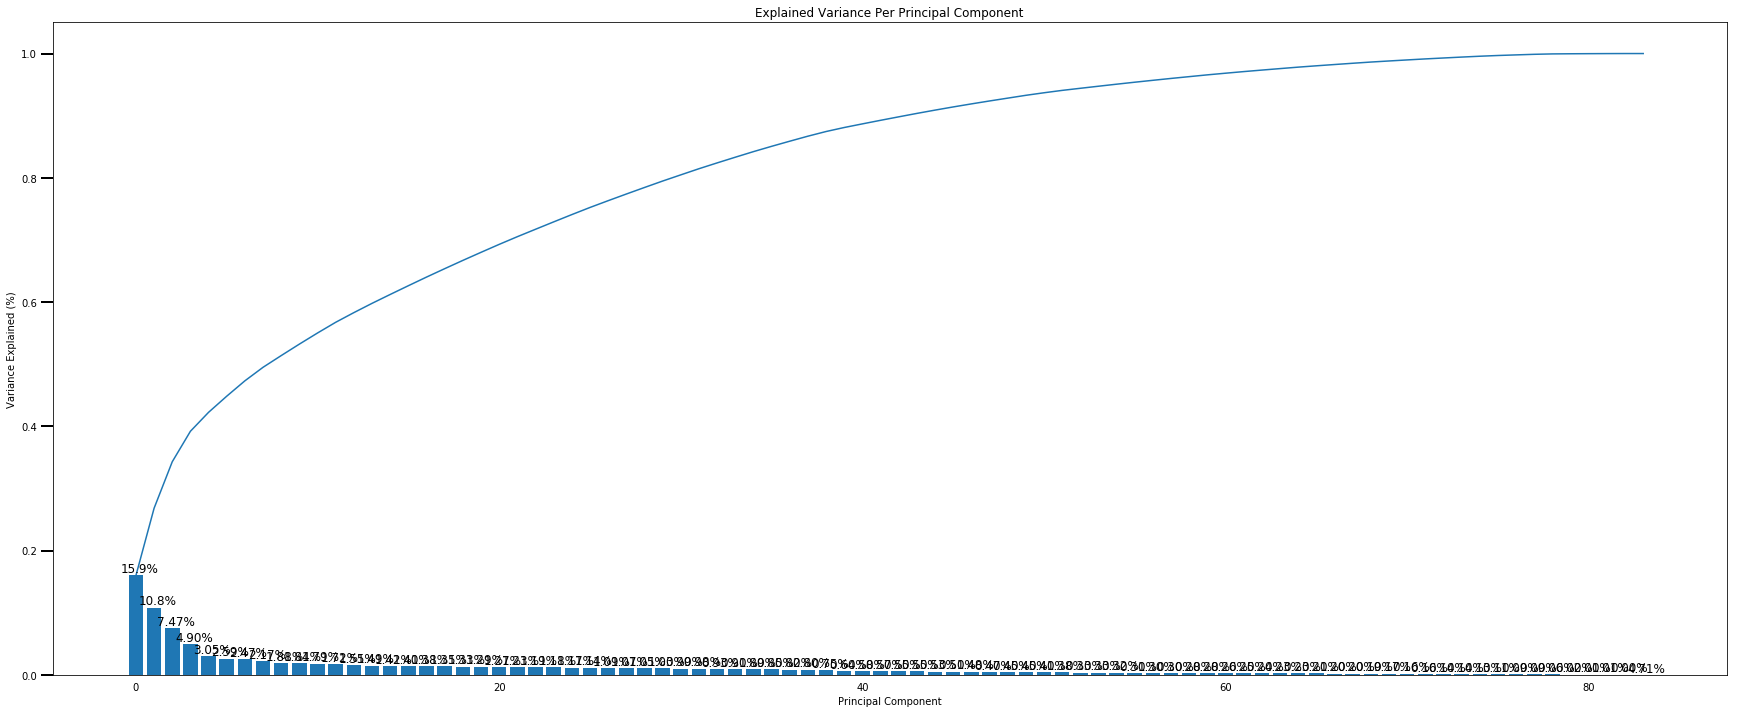

In [64]:
plot_explained_variance(pca)

In [65]:
# Find the optimal number of components retaining a minimum variance of 85%
n_components = min(np.where(np.cumsum(pca.explained_variance_ratio_)>0.85)[0]+1)
n_components

36

In [66]:
# Re-apply PCA to the data while selecting for number of components to retain.
n_comp = 36
pca = PCA(n_components=n_comp)
X_pca = pca.fit_transform(df_scaled)

In [67]:
pca.explained_variance_ratio_.sum()

0.85041919233187946

First, I applied PCA to the scaled dataset without specifying the number of components and plotted the results. Then I wrote a code for getting the number of components which explains atleast 85% of the variance and that number came out to be 36. So, I will be retaining 36 principal components for the next step.  

### Step 2.3: Interpret Principal Components

In [68]:
# HINT: Try defining a function here or in a new cell that you can reuse in the
# other cells.
def map_weights_features(pca, features, i):
    '''
        This function maps weights for the ith principal component to corresponding feature names
        
        Parameters:
            pca: PCA fitted object
            features: Feature or column names in list form
            n: component number you want to map weights for
        
        Returns:
            A dataframe of features and their corresponding weights
    '''
    feature_weights = {'feature': [], 'weight': []}
    
    for count, feature in enumerate(features):
        feature_weights['feature'].append(feature) 
        # The index of pca.components_ starts from zero so first component is at index 0 hence i-1 is used
        feature_weights['weight'].append(round(pca.components_[i-1][count], 5))
    
    df_feature_weight = pd.DataFrame().from_dict(feature_weights).sort_values(by='weight', ascending=False)
    
    return df_feature_weight


def compare_component_weights(features, pca, i):
    '''
        Plots and Compares the weights of ith component in few of the features
        
        Parameters:
           features : column or feature names
           pca: Fitted PCA object
           n: nth component
    '''
    # PCA components
    # Create a dataframe consisting of pca components and get the nth component weights
    # The index of pca.components_ starts from zero so first component is at index 0 hence i-1 is used
    pca_component = pd.DataFrame(np.round(pca.components_, 4), columns = features).iloc[i-1]
    # Sort the weights
    pca_component.sort_values(ascending=False, inplace=True)
    # Since the most important features are at the beginning and end of sorted list, just take 5 rows from start and 5 from end
    pca_component = pd.concat([pca_component.head(5),  pca_component.tail(5)])
    
    plt.figure(figsize=(10, 6))
    pca_component.plot(kind='bar', title='Principal Component ' + str(i))
    ax = plt.gca()
    ax.grid(linewidth='0.5', alpha=0.5)
    ax.set_axisbelow(True)
    plt.xlabel('Features')
    plt.ylabel('Weights')
    plt.show()

In [69]:
# Map weights for the first principal component to corresponding feature names
# and then print the linked values, sorted by weight.
map_weights_features(pca, df_few_missing_enc.columns, 1)

,feature,weight
62,PLZ8_ANTG3,0.20324
63,PLZ8_ANTG4,0.19558
80,CAMEO_INTL_2015_WEALTH,0.19533
37,HH_EINKOMMEN_SCORE,0.19298
67,ORTSGR_KLS9,0.18120
52,EWDICHTE,0.17837
8,FINANZ_HAUSBAUER,0.15986
61,PLZ8_ANTG2,0.14025
83,WOHNLAGE_URBAN,0.13812
49,KBA05_ANTG4,0.13727


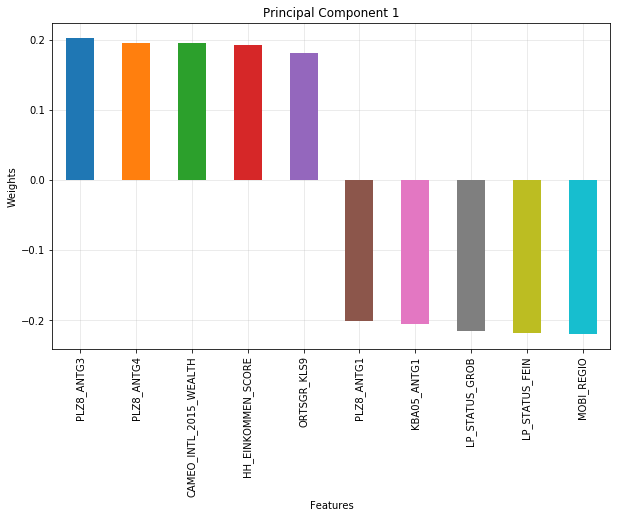

In [70]:
compare_component_weights(df_few_missing_enc.columns, pca, 1)

In [71]:
# Map weights for the second principal component to corresponding feature names
# and then print the linked values, sorted by weight.
map_weights_features(pca, df_few_missing_enc.columns, 2)

,feature,weight
0,ALTERSKATEGORIE_GROB,0.26448
5,FINANZ_VORSORGER,0.23787
23,SEMIO_ERL,0.22508
22,SEMIO_LUST,0.18450
16,RETOURTYP_BK_S,0.16309
9,FINANZTYP,0.11571
38,W_KEIT_KIND_HH,0.11091
26,SEMIO_KRIT,0.10379
31,SHOPPER_TYP,0.10163
28,SEMIO_KAEM,0.09524


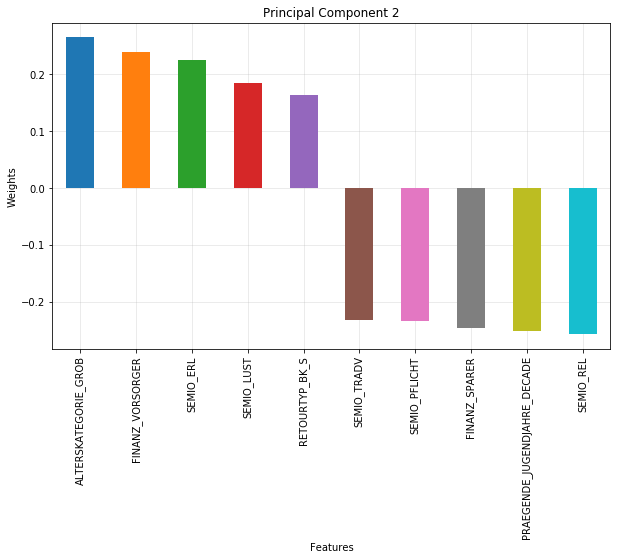

In [72]:
compare_component_weights(df_few_missing_enc.columns, pca, 2)

In [73]:
# Map weights for the third principal component to corresponding feature names
# and then print the linked values, sorted by weight.
map_weights_features(pca, df_few_missing_enc.columns, 3)

,feature,weight
21,SEMIO_VERT,0.33780
17,SEMIO_SOZ,0.26085
18,SEMIO_FAM,0.25345
24,SEMIO_KULT,0.24085
3,FINANZ_MINIMALIST,0.15152
9,FINANZTYP,0.11510
16,RETOURTYP_BK_S,0.09929
5,FINANZ_VORSORGER,0.08491
19,SEMIO_REL,0.08301
38,W_KEIT_KIND_HH,0.07966


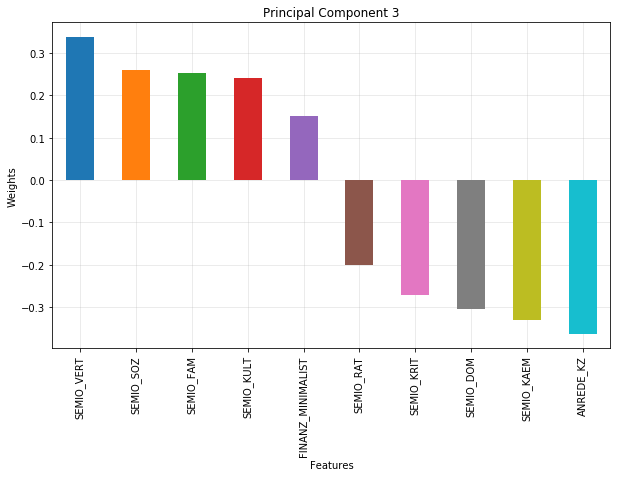

In [74]:
compare_component_weights(df_few_missing_enc.columns, pca, 3)

There are a lot of features so cannot plot the weight for all of them as it will distort the visualization.  

**First principal component:**  
From the weights, it is observed that first component is mainly focusing on the income and social status of the indiviual. PLZ8 macro-cell features are mostly positively associated with the wealth and income whereas the person level features and region features are negatively associated.  

**Second principal component:**   
It is mainly focused on person-level features mainly the in the personal topological features. The association is positive for aged, financially prepared and returning individuals and it's negative for the money saving, religious and traditional minded individual which is obvious as the people with older age tend to be more financially stable and are potential returning customers whereas the one with relgious, traditional and money saving individuals are the opposite.

**Third principal component:** 
Third component is also concerned with the personal topologies. There is a positive association for dreamful, social and family minded individuals and a negative association for rational, critical and dominant minded individuals.


Overall the principal components appear to be retaining the useful information from the actual features

## Step 3: Clustering

### Step 3.1: Apply Clustering to General Population

In [75]:
from sklearn.cluster import KMeans

In [76]:
scores = []
centers = range(1, 30, 2)
# Over a number of different cluster counts...
for k in centers:
    # run k-means clustering on the data and...
    model = KMeans(n_clusters=k).fit(X_pca)
    # compute the average within-cluster distances.
    scores.append(abs(model.score(X_pca)))

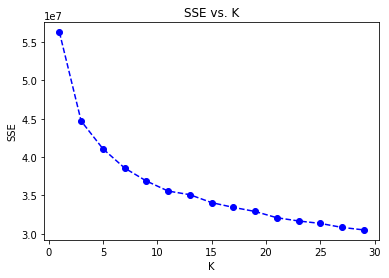

In [82]:
# Investigate the change in within-cluster distance across number of clusters.
# HINT: Use matplotlib's plot function to visualize this relationship.
plt.plot(centers, scores, linestyle='--', marker='o', color='b');
plt.xlabel('K');
plt.ylabel('SSE');
plt.title('SSE vs. K');

There isn't a clear elbow but I will choose to go with k=15 as that's where there's a little change in the pattern.

In [83]:
# Re-fit the k-means model with the selected number of clusters and obtain
# cluster predictions for the general population demographics data.
kmeans = KMeans(n_clusters=15)
km_model = kmeans.fit(X_pca)

In [84]:
predict_general = km_model.predict(X_pca)

The model training took quite a long because I had selected a range of values for k from 1 to 30 with a step of 2. The elbow plot didn't show a very clear elbow but their was a slight nudge before k=15 so I decided to choose 15 as the value of k. Hence the data will be segmented into 15 clusters.

### Step 3.2: Apply All Steps to the Customer Data

Now that you have clusters and cluster centers for the general population, it's time to see how the customer data maps on to those clusters.

In [85]:
# Load in the customer demographics data.
customers = pd.read_csv('Udacity_CUSTOMERS_Subset.csv', delimiter=';')

In [86]:
customers.head()

,AGER_TYP,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,...,PLZ8_ANTG1,PLZ8_ANTG2,PLZ8_ANTG3,PLZ8_ANTG4,PLZ8_BAUMAX,PLZ8_HHZ,PLZ8_GBZ,ARBEIT,ORTSGR_KLS9,RELAT_AB
0,2,4,1,5.0,5,1,5,1,2,2,...,3.0,3.0,1.0,0.0,1.0,5.0,5.0,1.0,2.0,1.0
1,-1,4,1,NaN,5,1,5,1,3,2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-1,4,2,2.0,5,1,5,1,4,4,...,2.0,3.0,3.0,1.0,3.0,3.0,2.0,3.0,5.0,3.0
3,1,4,1,2.0,5,1,5,2,1,2,...,3.0,2.0,1.0,0.0,1.0,3.0,4.0,1.0,3.0,1.0
4,-1,3,1,6.0,3,1,4,4,5,2,...,2.0,4.0,2.0,1.0,2.0,3.0,3.0,3.0,5.0,1.0


In [125]:
# Apply preprocessing, feature transformation, and clustering from the general
# demographics onto the customer data, obtaining cluster predictions for the
# customer demographics data.

customers_processed = clean_data(customers) 

/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3790: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)
/opt/conda/lib/python3.6/site-packages/pandas/core/frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)
/opt/conda/lib/python3.6/site-packages/pandas/core/generic.py:5890: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


Making sure that data is cleaned

In [88]:
customers_processed.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE,WOHNLAGE_RURAL,WOHNLAGE_URBAN
0,4.0,1.0,5.0,5.0,1.0,5.0,1.0,2.0,2.0,2.0,...,0,0,0,0,1,0,1,3,1,0
2,4.0,2.0,2.0,5.0,1.0,5.0,1.0,4.0,4.0,2.0,...,0,0,0,0,1,0,3,4,0,1
3,4.0,1.0,2.0,5.0,1.0,5.0,2.0,1.0,2.0,6.0,...,0,0,0,0,0,1,2,4,1,0
4,3.0,1.0,6.0,3.0,1.0,4.0,4.0,5.0,2.0,2.0,...,0,1,0,0,3,1,4,1,0,1
5,3.0,1.0,4.0,5.0,1.0,5.0,1.0,2.0,3.0,5.0,...,0,0,0,0,1,0,3,4,0,1


In [89]:
customers_processed.isnull().sum().sum()

0

In [91]:
customers_processed.shape

(140271, 84)

In [126]:
# Scale the customers data
customers_scaled = ss.transform(customers_processed)

In [127]:
# Apply PCA transformation to customers data
customers_pca = pca.transform(customers_scaled)

In [94]:
# Apply clustering to the customers scaled and pca reduced customers data
predict_customers = km_model.predict(customers_pca)

### Step 3.3: Compare Customer Data to Demographics Data

In [119]:
# Compare the proportion of data in each cluster for the customer data to the
# proportion of data in each cluster for the general population.

n_clusters = len(km_model.cluster_centers_)

prop_general = []
prop_customers = []

clusters = range(1, n_clusters+1)

for i in range(n_clusters):
    # proportion of general population
    prop_gen = (predict_general==i).sum()/len(predict_general)
    prop_general.append(prop_gen)
    # proportion of customers
    prop_cust = (predict_customers==i).sum()/len(predict_customers)
    prop_customers.append(prop_cust)

df_prop = pd.DataFrame({'cluster': clusters, 'proportion_general': prop_general, 'proportion_customers': prop_customers})
df_prop.head()

,cluster,proportion_general,proportion_customers
0,1,0.091887,0.066564
1,2,0.058651,0.006409
2,3,0.111626,0.162999
3,4,0.080399,0.064318
4,5,0.067945,0.010729


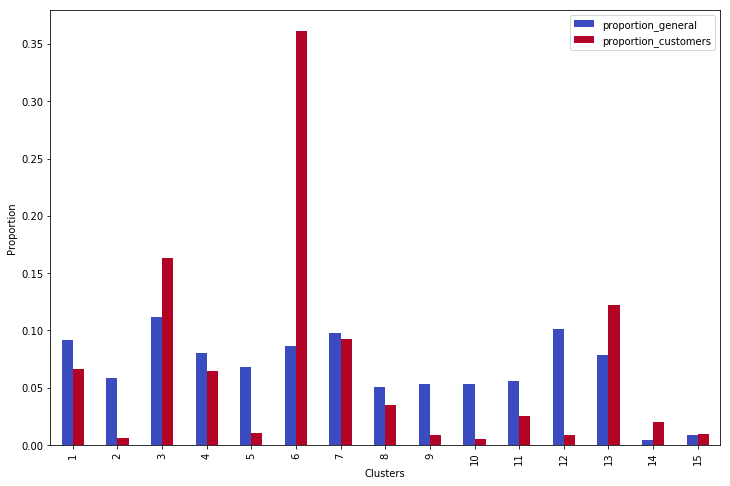

In [120]:
df_prop.plot(kind='bar', x='cluster', y=['proportion_general', 'proportion_customers'], figsize=(12, 8), colormap='coolwarm')
plt.xlabel('Clusters')
plt.ylabel('Proportion')
plt.show()

In [133]:
# What kinds of people are part of a cluster that is overrepresented in the
# customer data compared to the general population?
data_1 = ss.inverse_transform(pca.inverse_transform(customers_pca[np.where(predict_customers==6)])).round()
over_repr = pd.DataFrame(data=data_1,
          index=np.array(range(0, data_1.shape[0])),
          columns=df_few_missing_enc.columns)
over_repr.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE,WOHNLAGE_RURAL,WOHNLAGE_URBAN
0,3.0,1.0,6.0,3.0,3.0,4.0,3.0,3.0,3.0,3.0,...,0.0,1.0,-0.0,-0.0,3.0,1.0,4.0,1.0,-0.0,1.0
1,3.0,1.0,7.0,4.0,2.0,4.0,2.0,3.0,1.0,4.0,...,1.0,0.0,-0.0,-0.0,4.0,1.0,4.0,4.0,0.0,1.0
2,3.0,1.0,0.0,4.0,1.0,5.0,2.0,1.0,4.0,5.0,...,1.0,0.0,0.0,0.0,2.0,1.0,4.0,4.0,1.0,0.0
3,4.0,1.0,1.0,3.0,1.0,5.0,2.0,1.0,5.0,6.0,...,1.0,0.0,-0.0,-0.0,1.0,1.0,4.0,5.0,0.0,1.0
4,4.0,1.0,5.0,3.0,3.0,4.0,2.0,3.0,3.0,4.0,...,0.0,1.0,-0.0,-0.0,3.0,1.0,4.0,1.0,-0.0,1.0


In [136]:
data_2 = ss.inverse_transform(pca.inverse_transform(X_pca[np.where(predict_general==6)])).round()
over_repr = pd.DataFrame(data=data_2,
          index=np.array(range(0, data_2.shape[0])),
          columns=df_few_missing_enc.columns)
over_repr.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE,WOHNLAGE_RURAL,WOHNLAGE_URBAN
0,3.0,1.0,5.0,4.0,3.0,4.0,2.0,2.0,2.0,5.0,...,1.0,0.0,0.0,0.0,3.0,1.0,4.0,4.0,0.0,1.0
1,3.0,1.0,4.0,4.0,3.0,3.0,2.0,3.0,2.0,5.0,...,-0.0,-0.0,-0.0,1.0,4.0,0.0,5.0,1.0,-0.0,1.0
2,3.0,1.0,2.0,3.0,3.0,3.0,3.0,3.0,3.0,4.0,...,-0.0,0.0,0.0,0.0,4.0,1.0,1.0,4.0,0.0,1.0
3,2.0,1.0,6.0,3.0,2.0,4.0,1.0,1.0,4.0,6.0,...,-0.0,0.0,1.0,0.0,2.0,1.0,5.0,2.0,-0.0,1.0
4,3.0,1.0,5.0,3.0,1.0,5.0,1.0,1.0,4.0,5.0,...,1.0,-0.0,-0.0,-0.0,2.0,1.0,4.0,5.0,-0.0,1.0


In [137]:
# What kinds of people are part of a cluster that is underrepresented in the
# customer data compared to the general population?
data_3 = ss.inverse_transform(pca.inverse_transform(customers_pca[np.where(predict_customers==10)])).round()
under_repr = pd.DataFrame(data=data_3,
          index=np.array(range(0, data_3.shape[0])),
          columns=df_few_missing_enc.columns)
under_repr.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE,WOHNLAGE_RURAL,WOHNLAGE_URBAN
0,2.0,1.0,4.0,5.0,1.0,5.0,2.0,2.0,1.0,4.0,...,-0.0,0.0,-0.0,0.0,3.0,1.0,1.0,2.0,1.0,0.0
1,2.0,1.0,3.0,4.0,4.0,2.0,2.0,5.0,-0.0,2.0,...,0.0,0.0,0.0,0.0,5.0,0.0,1.0,2.0,-0.0,1.0
2,2.0,1.0,4.0,4.0,4.0,2.0,4.0,4.0,1.0,4.0,...,0.0,-0.0,-0.0,-0.0,5.0,1.0,1.0,4.0,1.0,0.0
3,2.0,1.0,4.0,4.0,4.0,2.0,3.0,4.0,1.0,3.0,...,0.0,-0.0,-0.0,-0.0,5.0,0.0,1.0,5.0,0.0,1.0
4,3.0,1.0,4.0,4.0,4.0,2.0,4.0,4.0,1.0,4.0,...,0.0,-0.0,0.0,0.0,5.0,-0.0,2.0,5.0,0.0,1.0


In [139]:
data_4 = ss.inverse_transform(pca.inverse_transform(X_pca[np.where(predict_customers==10)])).round()
under_repr = pd.DataFrame(data=data_4,
          index=np.array(range(0, data_4.shape[0])),
          columns=df_few_missing_enc.columns)
under_repr.head()

,ALTERSKATEGORIE_GROB,ANREDE_KZ,CJT_GESAMTTYP,FINANZ_MINIMALIST,FINANZ_SPARER,FINANZ_VORSORGER,FINANZ_ANLEGER,FINANZ_UNAUFFAELLIGER,FINANZ_HAUSBAUER,FINANZTYP,...,CAMEO_DEUG_2015_6,CAMEO_DEUG_2015_7,CAMEO_DEUG_2015_8,CAMEO_DEUG_2015_9,PRAEGENDE_JUGENDJAHRE_DECADE,PRAEGENDE_JUGENDJAHRE_MOVEMENT,CAMEO_INTL_2015_WEALTH,CAMEO_INTL_2015_LIFESTAGE,WOHNLAGE_RURAL,WOHNLAGE_URBAN
0,4.0,2.0,1.0,3.0,2.0,4.0,3.0,2.0,4.0,4.0,...,0.0,-0.0,0.0,-0.0,2.0,1.0,2.0,4.0,-0.0,1.0
1,4.0,2.0,2.0,4.0,1.0,5.0,1.0,2.0,4.0,4.0,...,-0.0,0.0,0.0,0.0,1.0,0.0,2.0,5.0,0.0,1.0
2,2.0,1.0,7.0,3.0,4.0,2.0,3.0,4.0,2.0,4.0,...,1.0,-0.0,0.0,0.0,5.0,1.0,4.0,3.0,0.0,1.0
3,3.0,1.0,6.0,2.0,5.0,1.0,5.0,5.0,2.0,2.0,...,1.0,0.0,-0.0,0.0,5.0,1.0,4.0,3.0,1.0,0.0
4,3.0,2.0,1.0,2.0,3.0,4.0,3.0,2.0,3.0,4.0,...,1.0,0.0,0.0,0.0,3.0,1.0,4.0,4.0,0.0,1.0


### Comparing Customer Data to Demographics Data

The customers in clusters 6, 13 and 3 are relatively popular with the mail-order company as seen from the analysis and the clusters 2, 10 and 12 are relatively unpopular. Although it's difficult to describe exactly what kind of segments are the potential customers but we can do further analysis to figure that out. Overall, this analysis will surely prove to be useful to the clients and stakeholders but could be further improved with the use of data and features that we dropped after properly engineering those features.